In [1]:
import pandas as pd
import json
import string
import math
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('stopwords')
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
#from google.colab import files
#uploaded = files.upload()
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
#Getting the 2% yelp review file (mixed)
link='https://drive.google.com/open?id=1UZrJemORwgEb4mVyVdtkbqOt-VYrgIg7'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('review_csv_2%.csv')

1UZrJemORwgEb4mVyVdtkbqOt-VYrgIg7


In [4]:
#Getting the 2% yelp review file (mixed) - with equal rating distribution
link='https://drive.google.com/open?id=1rsJIyZ5tggwFDKYqQ_A3sOSDV6cilXRq'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('review_eq_2%.csv')

1rsJIyZ5tggwFDKYqQ_A3sOSDV6cilXRq


In [5]:
#Getting the 2% food review file
link='https://drive.google.com/open?id=1jZVzy52gDqnPcSmvwfsDJ6GxKOWa6Rgq'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('review_food_2%.csv')

1jZVzy52gDqnPcSmvwfsDJ6GxKOWa6Rgq


In [6]:
#Getting the 2% food review file - with equal rating distribution
link='https://drive.google.com/open?id=1VepmxxaKAhx6Yl9C66N2xrVM0g38CzJR'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('review_foodeq_2%.csv')

1VepmxxaKAhx6Yl9C66N2xrVM0g38CzJR


In [10]:
#Getting the yelp business file 2018
link='https://drive.google.com/open?id=1gTdgoZUc4y03im0g6KN41lK672alKKvi'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('yelp_business.csv')

1gTdgoZUc4y03im0g6KN41lK672alKKvi


In [11]:
#Reading the review file to panda
yelp_2_review_data = pd.read_csv('review_csv_2%.csv', sep=",", index_col=0)
yelp_2_review_data = yelp_2_review_data.reset_index(drop=True) #re-indexing
yelp_2_review_data.sample(n=5)    # Randomly select n=5 rows and return them

,review_id,user_id,business_id,stars,date,text,useful,funny,cool,categories
58435,0Gc9XyVMdXgC9OJMS1q7Fg,Ih-eg7FgOsoSh9L4Tzhodg,ii8sAGBexBOJoYRFafF9XQ,1,2015-02-14,This is the first and last time I'd Ever stay ...,1,0,0,hotels casinos event planning services hotel...
79203,VA5ucSo9n1yluiljAN5nbw,JmJlcjIG0WxI652UdEtPXw,BEplfZTUzYwApjMUaOA12w,5,2017-11-15,NOT AFRAID of FLAVOR. So happy to find a rest...,0,0,0,mexican restaurants tex mex tacos
85140,FYTzwG3BTHd28-pLa0wDeQ,yZztV65z4ct6YxirsaFLcg,t8V_P7ZzRrhDQoqeoGVahQ,5,2016-11-20,This was my first time here and I loved everyt...,0,0,0,lounges gastropubs bars tapas bars nightlife a...
104723,8C0vq8kTs4LCrWn4M7FL4g,DNC1C3_Vw1AwiKomUcSO4g,acTFhUpJpWyrMmdoNFwyuA,5,2015-10-10,4 1\/2 stars thru 110 reviews cant be wrong an...,0,0,0,salvadoran restaurants colombian latin american
95606,16TAhANwW2acyRWMqttUXg,cNx5fD_Spw71JVF3hW8fEQ,z5J9U_HU4iVLwaCH6rdC2w,3,2016-04-23,I saw this place while headed to the McDonald'...,0,1,0,restaurants chicken shop soul food breakfast ...


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


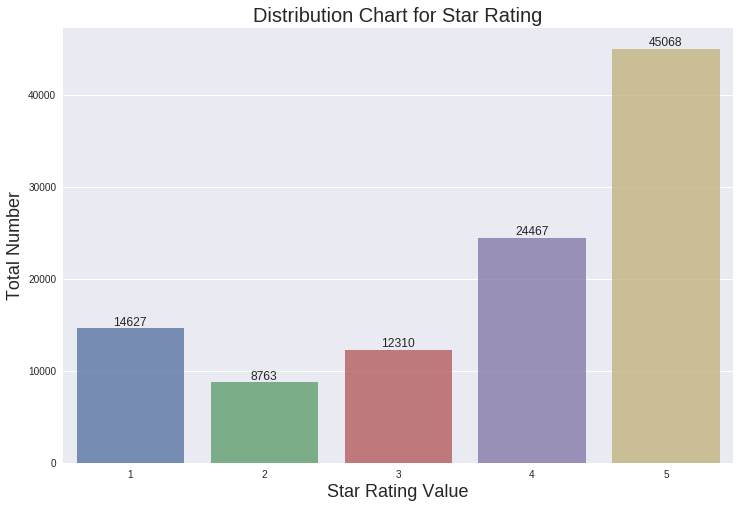

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# checking the Star rating distribution of dataset

dist = yelp_2_review_data['stars'].value_counts()
dist = dist.sort_index()

# Plotting the Distribution
plt.figure(figsize=(12,8))
ax = sns.barplot(dist.index, dist.values, alpha=0.8)
plt.title("Distribution Chart for Star Rating", fontsize=20)
plt.ylabel("Total Number", fontsize=18)
plt.xlabel("Star Rating Value", fontsize=18)

rects = ax.patches
labels = dist.values
for rect, label in zip(rects, labels):
  height = rect.get_height()
  ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
  
plt.show()

In [13]:
#CREATING A NEW COLUMN IN THE DATASET FOR THE NUMBER OF WORDS IN THE REVIEW
yelp_2_review_data['length'] = yelp_2_review_data['text'].apply(len)
yelp_2_review_data.head(2)

,review_id,user_id,business_id,stars,date,text,useful,funny,cool,categories,length
0,i8RhpEgalkeY97p0YQ0JeA,OzGlDEQ_vzH8QU9NBRs-pw,HxLouUPqiou7D6YK5t-DgQ,3,2011-03-06,"Pretty good, but it'll cost ya.\r\n\r\nThe Fre...",1,0,1,wine bars tapas bars canadian new bars night...,765
1,RH_VhBzxegIWT_crf9ButA,lxt4LomsbAjBvk5POhDTEw,giptYxR9l72ogEKaxqch4A,4,2011-05-30,Boyfriend had planned to pick up some sort of ...,8,6,6,food beer wine spirits,708


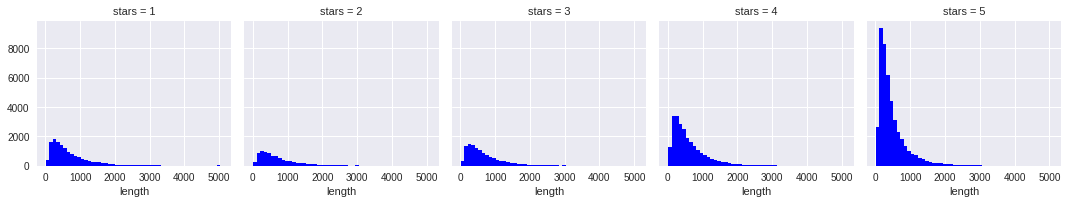

In [14]:
# COMPARING TEXT LENGTH TO STARS
graph = sns.FacetGrid(data=yelp_2_review_data,col='stars')
graph.map(plt.hist,'length',bins=50,color='blue')

In [0]:


#yelp_2_review_data = yelp_2_review_data.sample(frac=0.2, random_state=0) #uncomment to use full set of data
# import numpy as np

# # Drop missing values
# yelp_2_review_data.dropna(inplace=True)

# # Remove any 'neutral' ratings equal to 3
# yelp_2_review_data = yelp_2_review_data[yelp_2_review_data['stars'] != 3]

# # Encode 4s and 5s as 1 (positive sentiment) and 1s and 2s as 0 (negative sentiment)
# yelp_2_review_data['Sentiment'] = np.where(yelp_2_review_data['stars'] > 3, 1, 0)
# yelp_2_review_data.head()


In [0]:
# Convert text to lowercase
df = yelp_2_review_data;
df.loc[:,'text'] = df['text'].str.lower()

# Remove punctuation
df ['text']= df ['text'].str.replace('[^a-zA-Z]', ' ')

In [0]:
# Create the lemmatizer and the different stemmers
snowball = SnowballStemmer("english")
porter = PorterStemmer()
lancaster=LancasterStemmer()
lemmatizer = WordNetLemmatizer()

In [0]:
# Porter Stemmer & Lemmitization tokens ------------------------------------
def portlemtokens(x):
    x = x.split()
    stems = []
    [stems.append(porter.stem(lemmatizer.lemmatize(word,pos="a"))) for word in x]
    return stems

In [18]:
# Define the vectorizer
vectorizer = TfidfVectorizer(tokenizer = portlemtokens, stop_words = 'english', ngram_range=(1,2), max_features=None,  min_df = 0.01)

# Fit the vectorizers to the data
feature_words = vectorizer.fit_transform(df['text'])

features = pd.DataFrame(feature_words.toarray(), columns = vectorizer.get_feature_names())
features = pd.concat([features, df[['stars']]], axis = 1)
features.sample(n=5)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_wor

,abl,abov,absolut,accommod,actual,ad,add,addit,afford,afternoon,...,write,wrong,ye,year,year ago,yelp,young,yum,yummi,stars
3043,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
81248,0.0,0.0,0.0,0.0,0.137636,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5500,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
73202,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
6134,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [0]:
# new_features = features[features.select_dtypes(include=['number']).columns] * 1000000
# new_features = pd.concat([new_features, df[['stars']]], axis = 1)
# new_features = round(new_features[new_features.select_dtypes(include=['number']).columns])
# new_features = new_features.iloc[:,:].astype(int)
# new_features.sample(n=5)

In [0]:
#new_features = new_features.drop(columns = ['stars'])
# new_features.sample(n=5)
#new_features = pd.concat([new_features, df[['stars']]], axis = 1)


In [20]:
# CLASSIFICATION AS KAGGLE EXAMPLE WITH ONLY 3 CLASSES
x = features[(features['stars']==1) | (features['stars']==3) | (features['stars']==5)]
y=x.loc[:,'stars']
print(x.shape)

from sklearn.model_selection import train_test_split, cross_val_score
# SPLITTING THE DATASET INTO TRAINING SET AND TESTING SET
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify= x['stars'],random_state=101)

#Seperating the stars
y_train=x_train.loc[:,'stars']
y_test=x_test.loc[:,'stars']

#Dropping the stars from the x features
x_train=x_train.drop(columns=['stars'])
x_test=x_test.drop(columns=['stars'])

y_test = y_test.replace(1, 0)
y_test = y_test.replace(2, 1)
y_test = y_test.replace(3, 2)
y_test = y_test.replace(4, 3)
y_test = y_test.replace(5, 4)

y_train = y_train.replace(1, 0)
y_train = y_train.replace(2, 1)
y_train = y_train.replace(3, 2)
y_train = y_train.replace(4, 3)
y_train = y_train.replace(5, 4)

x_train = x_train.as_matrix()
x_test = x_test.as_matrix()
y_train = y_train.as_matrix()
y_test = y_test.as_matrix()

nb_classes = 5

(72005, 933)


In [0]:
# # CLASSIFICATION WITH ALL 5 STAR CLASSES
# x = features.copy()
# y=x.loc[:,'stars']
# print(x.shape)

# from sklearn.model_selection import train_test_split, cross_val_score
# # SPLITTING THE DATASET INTO TRAINING SET AND TESTING SET
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify= x['stars'],random_state=101)

# #Seperating the stars
# y_train=x_train.loc[:,'stars']
# y_test=x_test.loc[:,'stars']

# #Dropping the stars from the x features
# x_train=x_train.drop(columns=['stars'])
# x_test=x_test.drop(columns=['stars'])

# y_test = y_test.replace(1, 0)
# y_test = y_test.replace(2, 1)
# y_test = y_test.replace(3, 2)
# y_test = y_test.replace(4, 3)
# y_test = y_test.replace(5, 4)

# y_train = y_train.replace(1, 0)
# y_train = y_train.replace(2, 1)
# y_train = y_train.replace(3, 2)
# y_train = y_train.replace(4, 3)
# y_train = y_train.replace(5, 4)

# x_train = x_train.as_matrix()
# x_test = x_test.as_matrix()
# y_train = y_train.as_matrix()
# y_test = y_test.as_matrix()



# nb_classes = 5


In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.pipeline import Pipeline

from bs4 import BeautifulSoup  
import re
import nltk
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize, pos_tag

import logging
from gensim.models import word2vec
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors

from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Lambda
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM, SimpleRNN, GRU
from keras.preprocessing.text import Tokenizer
from collections import defaultdict
from keras.layers.convolutional import Convolution1D
from keras import backend as K
from keras.layers.embeddings import Embedding


Using TensorFlow backend.


In [22]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk import sent_tokenize, word_tokenize, pos_tag
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

top_words = x_train.shape[1]
#top_words = 20000
maxlen = 100 
batch_size = 64
nb_epoch = 10


# # Vectorize X_train and X_test to 2D tensor
# tokenizer = Tokenizer(nb_words=top_words) #only consider top 20000 words in the corpse
# tokenizer.fit_on_texts(X_train)
# # tokenizer.word_index #access word-to-index dictionary of trained tokenizer

# sequences_train = tokenizer.texts_to_sequences(X_train)
# sequences_test = tokenizer.texts_to_sequences(X_test)

X_train_seq = sequence.pad_sequences(x_train, maxlen=maxlen)
X_test_seq = sequence.pad_sequences(x_test, maxlen=maxlen)

# X_train_seq = x_train
# X_test_seq = x_test


# one-hot encoding of y_train and y_test
print(y_train)
y_train_seq = np_utils.to_categorical(y_train)
print(y_train_seq)
y_test_seq = np_utils.to_categorical(y_test)

print('X_train shape:', X_train_seq.shape) #(27799, 100)
print('X_test shape:', X_test_seq.shape) #(3089, 100)
print('y_train shape:', y_train_seq.shape) #(27799, 2)
print('y_test shape:', y_test_seq.shape) #(3089, 2)

[4 4 0 ... 0 4 2]
[[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]]
X_train shape: (57604, 100)
X_test shape: (14401, 100)
y_train shape: (57604, 5)
y_test shape: (14401, 5)


In [0]:
# from keras import optimizers

# model1 = Sequential();
# model1.add(Embedding(top_words, maxlen, input_length=maxlen));
# model1.add(LSTM(128, return_sequences=True, recurrent_dropout=0.5));
# #model1.add(Dropout(0.2))
# model1.add(LSTM(60, recurrent_dropout=0.5));
# model1.add(Dense(5, activation='relu'));
# model1.add(Activation('softmax'));
# print(model1.summary());

# model1.compile(loss='binary_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])


# optimizer = optimizers.Adam(lr=0.01, decay=0.001);
# model1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# fit model
#model1.fit(X_train_seq, y_train_seq, batch_size=64, epochs=nb_epoch)


In [23]:
from keras import optimizers

model1 = Sequential()
model1.add(Embedding(top_words, 128, dropout=0.2))
model1.add(LSTM(128, dropout_W=0.2, dropout_U=0.2)) 
model1.add(Dense(nb_classes))
model1.add(Activation('softmax'))
model1.summary()

# model1 = Sequential();
# model1.add(Embedding(top_words, maxlen, input_length=maxlen));
# model1.add(LSTM(60, return_sequences=True, recurrent_dropout=0.5));
# model1.add(Dropout(0.5))
# model1.add(LSTM(60, recurrent_dropout=0.5));
# model1.add(Dense(60, activation='relu'));
# model1.add(Dense(5, activation='softmax'));
# print(model1.summary());

model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# optimizer = optimizers.Adam(lr=0.01, decay=0.001);
# model1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# fit model
model1.fit(X_train_seq, y_train_seq, batch_size=64, epochs=nb_epoch)

# Model evluation
score = model1.evaluate(X_test_seq, y_test_seq, batch_size=batch_size)
print('Test loss : {:.4f}'.format(score[0]))
print('Test accuracy : {:.4f}'.format(score[1]))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(128, dropout=0.2, recurrent_dropout=0.2)`
  """


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         119296    
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 645       
_________________________________________________________________
activation_1 (Activation)    (None, 5)                 0         
Total params: 251,525
Trainable params: 251,525
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
57604/57604 [==============================] - 300s 5ms/step - loss: 0.3275 - acc: 0.8498
Epoch 2/10
57604/57604 [==============================] - 299s 5ms/step - loss: 0.3254 - acc: 0.8504
Epoch 3/10
57604/5

In [24]:
from keras import optimizers

model1 = Sequential()
model1.add(Embedding(top_words, 128, dropout=0.2))
model1.add(LSTM(128, dropout_W=0.2, dropout_U=0.2)) 
model1.add(Dense(nb_classes))
model1.add(Activation('softmax'))
model1.summary()

# model1 = Sequential();
# model1.add(Embedding(top_words, maxlen, input_length=maxlen));
# model1.add(LSTM(60, return_sequences=True, recurrent_dropout=0.5));
# model1.add(Dropout(0.5))
# model1.add(LSTM(60, recurrent_dropout=0.5));
# model1.add(Dense(60, activation='relu'));
# model1.add(Dense(5, activation='softmax'));
# print(model1.summary());

model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# optimizer = optimizers.Adam(lr=0.01, decay=0.001);
# model1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# fit model
model1.fit(X_train_seq, y_train_seq, batch_size=32, epochs=nb_epoch)

# Model evluation
score = model1.evaluate(X_test_seq, y_test_seq, batch_size=batch_size)
print('Test loss : {:.4f}'.format(score[0]))
print('Test accuracy : {:.4f}'.format(score[1]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(128, dropout=0.2, recurrent_dropout=0.2)`
  """


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 128)         119296    
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 645       
_________________________________________________________________
activation_2 (Activation)    (None, 5)                 0         
Total params: 251,525
Trainable params: 251,525
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
 3200/57604 [>.............................] - ETA: 6:50 - loss: 0.3416 - acc: 0.8469

KeyboardInterrupt: ignored

In [25]:
# Construct a simple LSTM
model1 = Sequential()
model1.add(Embedding(top_words, 60))
model1.add(Dropout(0.2))
model1.add(LSTM(60, dropout_W=0.2, dropout_U=0.2)) 
model1.add(Dense(60, activation = 'relu'))
model1.add(Dense(5, activation = 'softmax'))
# model1.add(Activation('softmax'))
model1.summary()

# Compile LSTM
model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model1.fit(X_train_seq, y_train_seq, batch_size=batch_size, nb_epoch=nb_epoch, verbose=1)

# Model evluation
score = model1.evaluate(X_test_seq, y_test_seq, batch_size=batch_size)
print('Test loss : {:.4f}'.format(score[0]))
print('Test accuracy : {:.4f}'.format(score[1]))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(60, dropout=0.2, recurrent_dropout=0.2)`
  after removing the cwd from sys.path.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 60)          55920     
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 60)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60)                29040     
_________________________________________________________________
dense_3 (Dense)              (None, 60)                3660      
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 305       
Total params: 88,925
Trainable params: 88,925
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from ipykernel import kernelapp as app


Epoch 1/10
57604/57604 [==============================] - 118s 2ms/step - loss: 0.3292 - acc: 0.8493
Epoch 2/10
57604/57604 [==============================] - 115s 2ms/step - loss: 0.3256 - acc: 0.8504
Epoch 3/10
57604/57604 [==============================] - 116s 2ms/step - loss: 0.3253 - acc: 0.8504
Epoch 4/10
57604/57604 [==============================] - 116s 2ms/step - loss: 0.3251 - acc: 0.8504
Epoch 5/10
57604/57604 [==============================] - 115s 2ms/step - loss: 0.3251 - acc: 0.8504
Epoch 6/10
57604/57604 [==============================] - 117s 2ms/step - loss: 0.3251 - acc: 0.8504
Epoch 7/10
57604/57604 [==============================] - 116s 2ms/step - loss: 0.3250 - acc: 0.8504
Epoch 8/10
57604/57604 [==============================] - 116s 2ms/step - loss: 0.3251 - acc: 0.8504
Epoch 9/10
57604/57604 [==============================] - 116s 2ms/step - loss: 0.3250 - acc: 0.8504
Epoch 10/10
14401/14401 [==============================] - 6s 417us/step
Test loss : 0.3250

In [0]:
# # get weight matrix of the embedding layer
# model1.layers[0].get_weights()[0] # weight matrix of the embedding layer, word-by-dim matrix
# print("Size of weight matrix in the embedding layer : ", \
#       model1.layers[0].get_weights()[0].shape) #(20000, 128)

# # get weight matrix of the hidden layer
# print("Size of weight matrix in the hidden layer : ", \
#       model1.layers[1].get_weights()[0].shape) #(128, 512)  weight dim of LSTM - w

# # get weight matrix of the output layer
# print("Size of weight matrix in the output layer : ", \
#       model1.layers[2].get_weights()[0].shape) #(128, 2) weight dim of dense layer